In [1]:
# Importation
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv', parse_dates=['Date'])
data.head()

,Nuber,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [3]:
# We are just seeing the layout of the data and the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Nuber                     5511 non-null   int64         
 1   Date                      5511 non-null   datetime64[ns]
 2   Time                      5511 non-null   object        
 3   State/UnionTerritory      5511 non-null   object        
 4   ConfirmedIndianNational   5511 non-null   object        
 5   ConfirmedForeignNational  5511 non-null   object        
 6   Cured                     5511 non-null   int64         
 7   Deaths                    5511 non-null   int64         
 8   Confirmed                 5511 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 387.6+ KB


In [4]:
# The columns & rows of the master df
data.shape

(5511, 9)

In [5]:
# dropping cols & setting the staes as index
cols = ['Nuber']
data.drop(cols, axis= 1, inplace=True)
data = data.set_index('Date')
data.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-01-02', '2020-02-02',
               '2020-03-02', '2020-04-02', '2020-05-02', '2020-06-02',
               '2020-07-02', '2020-08-02',
               ...
               '2020-08-23', '2020-08-23', '2020-08-23', '2020-08-23',
               '2020-08-23', '2020-08-23', '2020-08-23', '2020-08-23',
               '2020-08-23', '2020-08-23'],
              dtype='datetime64[ns]', name='Date', length=5511, freq=None)

In [6]:
#just making sure the code worked
data.head()

,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,
2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2020-01-02,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,6:00 PM,Kerala,3,0,0,0,3
2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [7]:
# Grouping the cases and states
df1 = data.groupby('State/UnionTerritory')['Confirmed'].sum()

In [8]:
df1.head()

State/UnionTerritory
Andaman and Nicobar Islands      49187
Andhra Pradesh                 7423064
Arunachal Pradesh                76751
Assam                          2268628
Bihar                          2950884
Name: Confirmed, dtype: int64

In [12]:
df1.max()

25654779

In [13]:
df1.min()

2

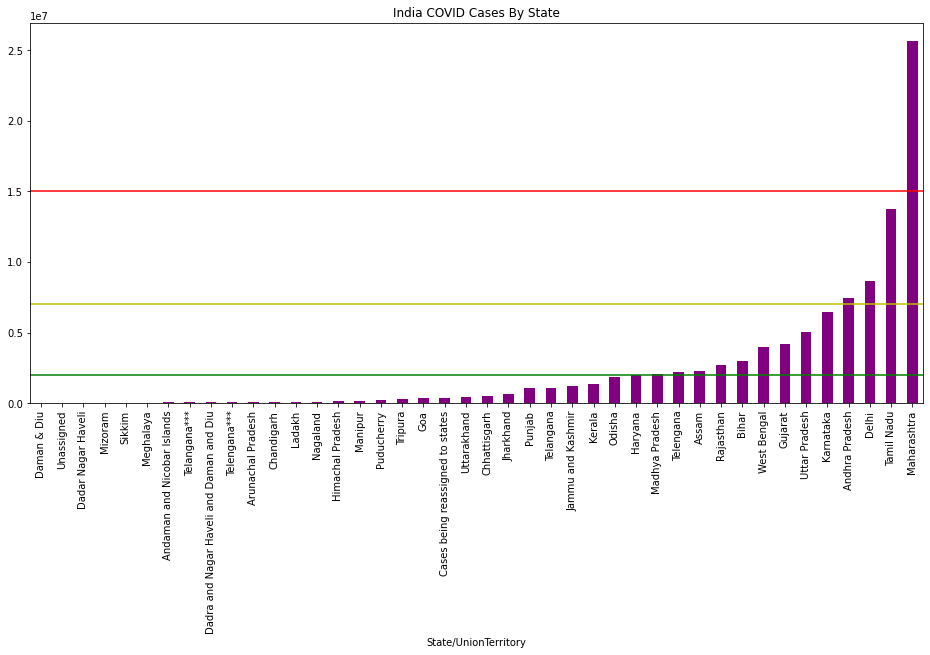

In [9]:
# Total growth
df1.sort_values(ascending=True).plot.bar(figsize=(16,7), color='purple', title='India COVID Cases By State')
plt.axhline(y=2000000, color='g', linestyle='-')
plt.axhline(y=7000000, color='y', linestyle='-')   
plt.axhline(y=15000000, color='r', linestyle='-')